In [1]:
import sys
sys.path.append("..")

import os
os.environ['OPENBLAS_NUM_THREADS'] = '1'

from waveforms import mem_freq_XPHM, mem_freq_XPHM_only, mem_freq_XPHM_only_v2
import bilby
import numpy as np
import matplotlib.pyplot as plt

In [2]:
parameters = dict(
    mass_1=33,
    mass_2=30,
    a_1=0.5,
    a_2=0.4,
    luminosity_distance=400,
    theta_jn=np.pi/3,
    psi=1,                   # guess
    phase=5,                   # guess
    geocent_time=1126259642.413,
    ra=3,                
    dec=-1.2108,
    tilt_1 = 0,
    tilt_2 = 0,
    time_jitter=0,
    phi_12=0.2,
    phi_jl=0.2
)

duration = 4
sampling_frequency = 2048
minimum_frequency = 20.0
maximum_frequency = 1024.0
reference_frequency = 20.0
waveform_name = 'IMRPhenomXPHM'
roll_off = 0.4
amplitude = 1.0

In [3]:
waveform_generator_bilby = bilby.gw.waveform_generator.WaveformGenerator(
    duration=duration,
    sampling_frequency=sampling_frequency,
    frequency_domain_source_model= bilby.gw.source.lal_binary_black_hole,
    parameter_conversion = bilby.gw.conversion.convert_to_lal_binary_black_hole_parameters,
    waveform_arguments=dict(duration=duration,
                            minimum_frequency=minimum_frequency,
                            maximum_frequency=maximum_frequency,
                            sampling_frequency=sampling_frequency,
                            reference_frequency=reference_frequency,
                            waveform_approximant=waveform_name,
                            )

)

waveform_generator_gwmemory = bilby.gw.waveform_generator.WaveformGenerator(
    duration=duration,
    sampling_frequency=sampling_frequency,
    frequency_domain_source_model= mem_freq_XPHM,
    parameter_conversion = bilby.gw.conversion.convert_to_lal_binary_black_hole_parameters,
    waveform_arguments=dict(duration=duration,
                            roll_off=roll_off,
                            minimum_frequency=minimum_frequency,
                            maximum_frequency=maximum_frequency,
                            sampling_frequency=sampling_frequency,
                            reference_frequency=reference_frequency,
                            bilby_generator = waveform_generator_bilby,
                            amplitude=amplitude)
)

18:31 bilby INFO    : Waveform generator initiated with
  frequency_domain_source_model: bilby.gw.source.lal_binary_black_hole
  time_domain_source_model: None
  parameter_conversion: bilby.gw.conversion.convert_to_lal_binary_black_hole_parameters
18:31 bilby INFO    : Waveform generator initiated with
  frequency_domain_source_model: waveforms.mem_freq_XPHM
  time_domain_source_model: None
  parameter_conversion: bilby.gw.conversion.convert_to_lal_binary_black_hole_parameters


In [4]:
full_wf = waveform_generator_gwmemory.frequency_domain_strain(parameters)
freq = waveform_generator_gwmemory.frequency_array
time = waveform_generator_gwmemory.time_array
full_wf_td = waveform_generator_gwmemory.time_domain_strain(parameters)

td_wf = full_wf_td['plus']-1j*full_wf_td['cross']

osc_wf = waveform_generator_bilby.time_domain_strain(parameters)
osc_wf_total = osc_wf['plus']-1j*osc_wf['cross']

shift 4093
shift2 7
shift 4093
shift2 7


/home/shunyin.cheung/.conda/envs/altenv/lib/python3.11/site-packages/matplotlib/cbook/__init__.py:1369: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


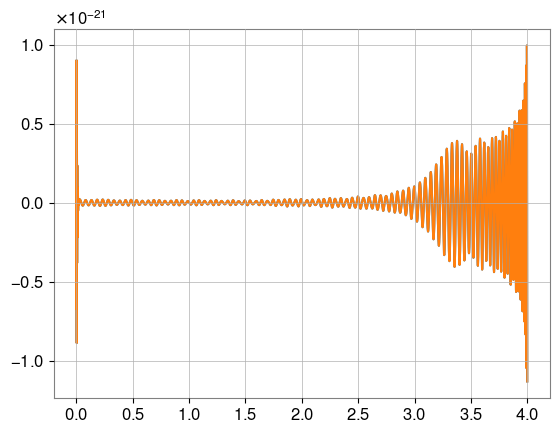

In [5]:
plt.figure()
plt.plot(time, td_wf)
plt.plot(time, osc_wf_total)
plt.show()

In [5]:
waveform_generator_mem = bilby.gw.waveform_generator.WaveformGenerator(
    duration=duration,
    sampling_frequency=sampling_frequency,
    frequency_domain_source_model= mem_freq_XPHM_only,
    parameter_conversion = bilby.gw.conversion.convert_to_lal_binary_black_hole_parameters,
    waveform_arguments=dict(duration=duration,
                            roll_off=roll_off,
                            minimum_frequency=minimum_frequency,
                            maximum_frequency=maximum_frequency,
                            sampling_frequency=sampling_frequency,
                            reference_frequency=reference_frequency,
                            bilby_generator = waveform_generator_bilby,
                            amplitude=amplitude,
                            activate_shift=False)
)

waveform_generator_mem_shift = bilby.gw.waveform_generator.WaveformGenerator(
    duration=duration,
    sampling_frequency=sampling_frequency,
    frequency_domain_source_model= mem_freq_XPHM_only,
    parameter_conversion = bilby.gw.conversion.convert_to_lal_binary_black_hole_parameters,
    waveform_arguments=dict(duration=duration,
                            roll_off=roll_off,
                            minimum_frequency=minimum_frequency,
                            maximum_frequency=maximum_frequency,
                            sampling_frequency=sampling_frequency,
                            reference_frequency=reference_frequency,
                            bilby_generator = waveform_generator_bilby,
                            amplitude=amplitude,
                            activate_shift = True)
)

15:38 bilby INFO    : Waveform generator initiated with
  frequency_domain_source_model: waveforms.mem_freq_XPHM_only
  time_domain_source_model: None
  parameter_conversion: bilby.gw.conversion.convert_to_lal_binary_black_hole_parameters
15:38 bilby INFO    : Waveform generator initiated with
  frequency_domain_source_model: waveforms.mem_freq_XPHM_only
  time_domain_source_model: None
  parameter_conversion: bilby.gw.conversion.convert_to_lal_binary_black_hole_parameters


In [6]:
time = waveform_generator_gwmemory.time_array
full_wf_td = waveform_generator_mem.time_domain_strain(parameters)
td_wf = full_wf_td['plus']-1j*full_wf_td['cross']

time = waveform_generator_gwmemory.time_array
full_wf_td2 = waveform_generator_mem_shift.time_domain_strain(parameters)
td_wf2 = full_wf_td2['plus']-1j*full_wf_td2['cross']

shift 4093
shift2 7
shift 4093
shift2 7


/home/shunyin.cheung/.conda/envs/altenv/lib/python3.11/site-packages/matplotlib/cbook/__init__.py:1369: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


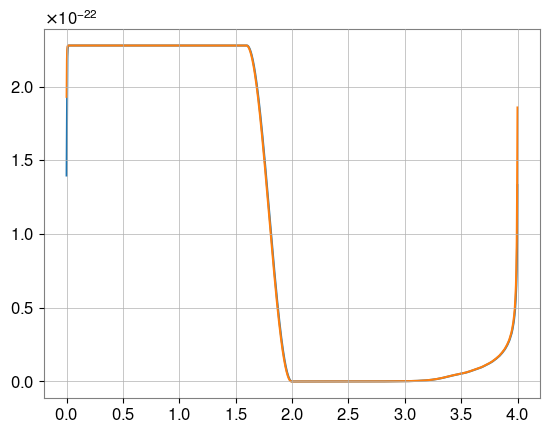

In [7]:
plt.figure()
plt.plot(time, td_wf)
plt.plot(time, td_wf2)
plt.show()

18:46 bilby INFO    : Waveform generator initiated with
  frequency_domain_source_model: waveforms.mem_freq_XPHM_only
  time_domain_source_model: None
  parameter_conversion: bilby.gw.conversion.convert_to_lal_binary_black_hole_parameters
18:46 bilby INFO    : Waveform generator initiated with
  frequency_domain_source_model: waveforms.mem_freq_XPHM_only_v2
  time_domain_source_model: None
  parameter_conversion: bilby.gw.conversion.convert_to_lal_binary_black_hole_parameters
/home/shunyin.cheung/.conda/envs/altenv/lib/python3.11/site-packages/matplotlib/cbook/__init__.py:1369: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


shift 4093
shift2 7


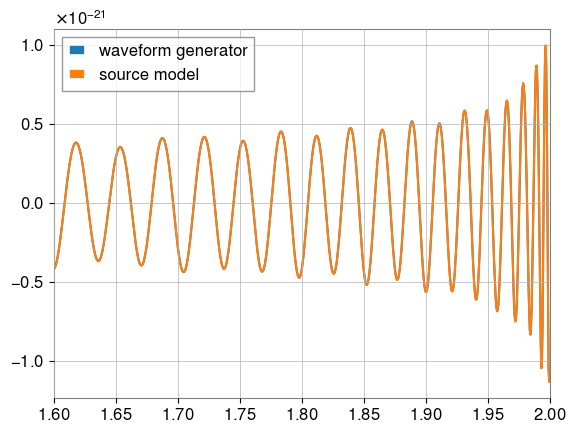

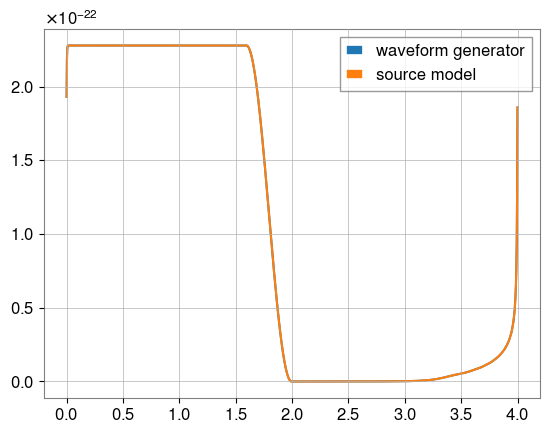

In [7]:
waveform_generator_mem = bilby.gw.waveform_generator.WaveformGenerator(
    duration=duration,
    sampling_frequency=sampling_frequency,
    frequency_domain_source_model= mem_freq_XPHM_only,
    parameter_conversion = bilby.gw.conversion.convert_to_lal_binary_black_hole_parameters,
    waveform_arguments=dict(duration=duration,
                            roll_off=roll_off,
                            minimum_frequency=minimum_frequency,
                            maximum_frequency=maximum_frequency,
                            sampling_frequency=sampling_frequency,
                            reference_frequency=reference_frequency,
                            waveform_approximant=waveform_name,
                            bilby_generator = waveform_generator_bilby,
                            amplitude=amplitude,
                            activate_shift=True)
)

waveform_generator_mem_v2 = bilby.gw.waveform_generator.WaveformGenerator(
    duration=duration,
    sampling_frequency=sampling_frequency,
    frequency_domain_source_model= mem_freq_XPHM_only_v2,
    parameter_conversion = bilby.gw.conversion.convert_to_lal_binary_black_hole_parameters,
    waveform_arguments=dict(duration=duration,
                            roll_off=roll_off,
                            minimum_frequency=minimum_frequency,
                            maximum_frequency=maximum_frequency,
                            sampling_frequency=sampling_frequency,
                            reference_frequency=reference_frequency,
                            waveform_approximant = waveform_name,
                            amplitude=amplitude,)
)

time = waveform_generator_mem.time_array
full_wf_td = waveform_generator_mem.time_domain_strain(parameters)
td_wf = full_wf_td['plus']-1j*full_wf_td['cross']

time = waveform_generator_mem.time_array
full_wf_td2 = waveform_generator_mem_v2.time_domain_strain(parameters)
td_wf2 = full_wf_td2['plus']-1j*full_wf_td2['cross']

plt.figure()
plt.plot(time, td_wf, label='waveform generator')
plt.plot(time, td_wf2, label='source model')
plt.legend()
plt.show()